# Machine Learning, Linear Model, Rotating Images, and Remembering the First Faculty

In [3]:
# packages

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.linear_model import LinearRegression

## Upload and resize image

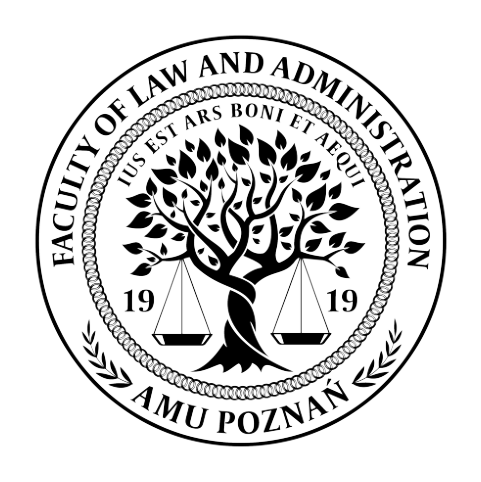

True

In [4]:
image = cv2.imread("logo.png", cv2.IMREAD_UNCHANGED)

height, width = image.shape[:2]

new_width, new_height = width // 5, height // 5
resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

plt.figure(figsize=(6,6))
plt.imshow(resized_image)
plt.axis("off")
plt.show()

cv2.imwrite("logo_resized.png", resized_image)

## Changing image into binary matrix

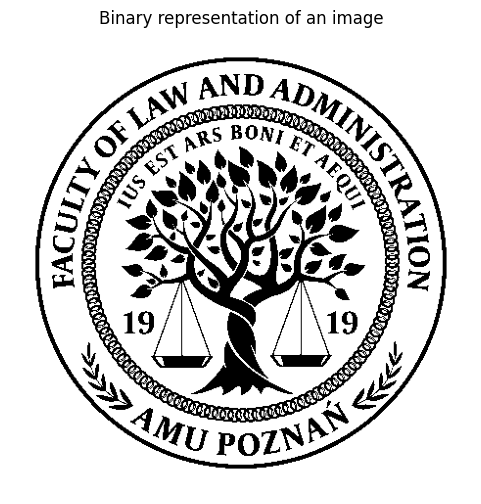

In [5]:
from PIL import Image

image = Image.open("logo_resized.png").convert("RGBA")

r, g, b, alpha = image.split()

gray_image = image.convert("L")

gray_array = np.array(gray_image)

binary_matrix = (gray_array < 128).astype(np.uint8)

alpha_array = np.array(alpha)
binary_matrix[alpha_array == 0] = 0

plt.figure(figsize=(6,6))
plt.imshow(1-binary_matrix, cmap="gray")
plt.title("Binary representation of an image")
plt.axis("off")
plt.show()

## Converting the matrix into a data frame and centering the image in the coordinate system.

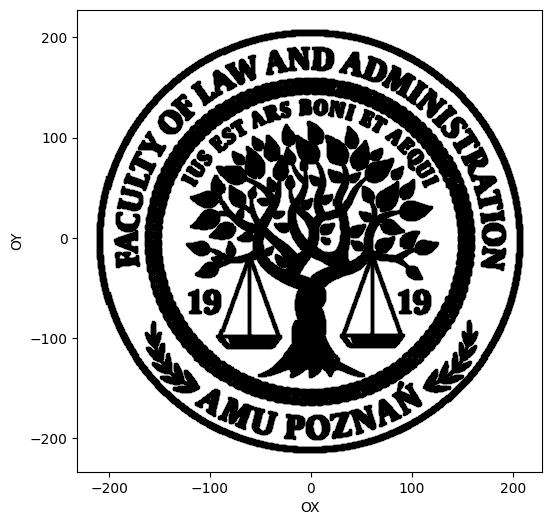

In [6]:
rows, cols = binary_matrix.shape
data = []

for y in range(rows):
    for x in range(cols):
        value = binary_matrix[y, x]
        if value != 0:
            data.append((x, y))

df = pd.DataFrame(data, columns=["X", "Y"])

df["Y"] = np.max(df["Y"]) - df["Y"]

df["Y"] = df["Y"] - np.mean(df["Y"])
df["X"] = df["X"] - np.mean(df["X"])

plt.figure(figsize=(6, 6))
plt.scatter(df["X"], df["Y"], c="black", s=1, marker="s")
plt.xlabel("OX")
plt.ylabel("OY")
plt.grid(False)
plt.show()

## Rotation matrix function

In [7]:
def rotation_matrix(theta):
    """Zwraca macierz obrotu 2D dla kąta theta (w radianach)."""
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

## Rotation of the image by an angle of $\theta$

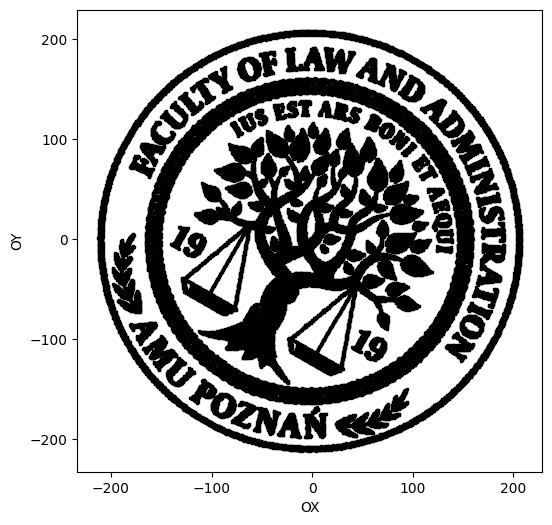

In [8]:
theta = np.pi/6

df_rotated = pd.DataFrame(df[['X', 'Y']].to_numpy() @ rotation_matrix(theta),
                          columns=["X", "Y"])

plt.figure(figsize=(6, 6))
plt.scatter(df_rotated["X"], df_rotated["Y"], c="black", s=1, marker="s")
plt.xlabel("OX")
plt.ylabel("OY")
plt.grid(False)
plt.show()

## Preparing the animation

Animation was saved.


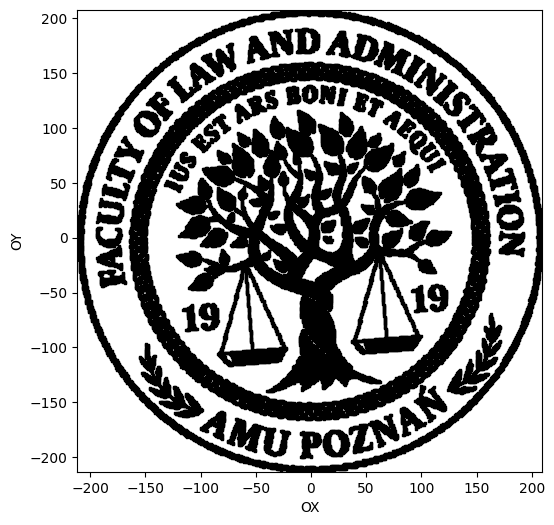

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
sc = ax.scatter([], [], c="black", s=1, marker="s")

ax.set_xlim(df["X"].min() - 1, df["X"].max() + 1)
ax.set_ylim(df["Y"].min() - 1, df["Y"].max() + 1)
ax.set_xlabel("OX")
ax.set_ylabel("OY")
ax.grid(False)

theta_values = np.arange(0, 2*np.pi, 0.1)

def update(frame):
    theta = theta_values[frame]
    df_rotated = pd.DataFrame(df[['X', 'Y']].to_numpy() @ rotation_matrix(theta),
                              columns=["X", "Y"])
    sc.set_offsets(df_rotated.to_numpy())
    return sc,

ani = animation.FuncAnimation(fig, update, frames=len(theta_values), interval=50, blit=True)

ani.save("animation.gif", writer=animation.PillowWriter(fps=20))

print("Animation was saved.")

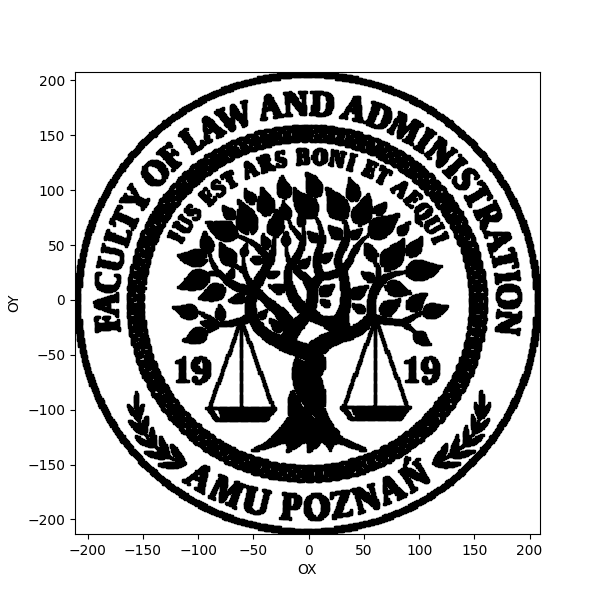

In [10]:
from IPython.display import display, Image
display(Image(filename="animation.gif"))

## Machine Learning

$$
\begin{bmatrix} x' & y' \end{bmatrix}
=
\begin{bmatrix} x & y \end{bmatrix}
\cdot
\begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}
$$



$$
x' = x \cos\theta + y \sin\theta
$$

$$
y' = -x \sin\theta + y \cos\theta
$$

In [11]:
thetas = np.arange(0, np.pi/2+0.1, np.pi/6)
X1 = np.sqrt(1/(1 + np.tan(thetas)**2))

df_ML = pd.DataFrame({'X1':X1[1:],
              'Y1':np.sqrt(1 - X1[1:]**2),
              'X2':X1[:-1],
              'Y2':np.sqrt(1 - X1[:-1]**2)})

In [12]:
X_vars = df_ML[["X1", "Y1"]]
Y_var1 = df_ML["X2"]
Y_var2 = df_ML["Y2"]

model1 = LinearRegression(fit_intercept=False)
model1.fit(X_vars, Y_var1)

model2 = LinearRegression(fit_intercept=False)
model2.fit(X_vars, Y_var2)

x_rot = model1.coef_
y_rot = model2.coef_

print(x_rot)
print(y_rot)

[0.8660254 0.5      ]
[-0.5        0.8660254]


In [13]:
rotation_matrix(-np.pi/6)

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

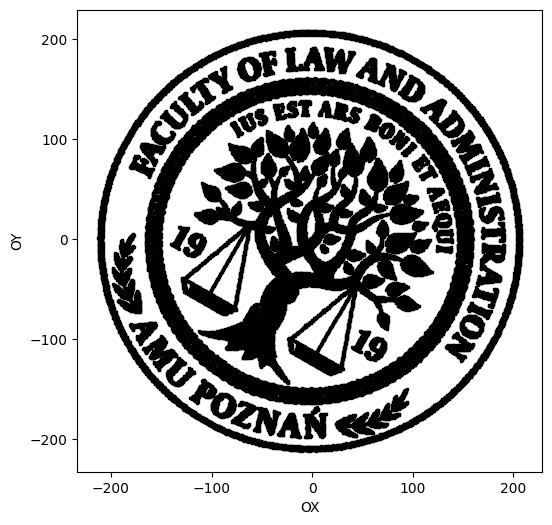

In [14]:
df_rotated_Ml = pd.DataFrame()
df_rotated_Ml['X'] = df['X']*x_rot[0] + df['Y']*x_rot[1]
df_rotated_Ml['Y'] = df['X']*y_rot[0] + df['Y']*y_rot[1]


plt.figure(figsize=(6, 6))
plt.scatter(df_rotated_Ml["X"], df_rotated_Ml["Y"], c="black", s=1, marker="s")
plt.xlabel("OX")
plt.ylabel("OY")
plt.grid(False)
plt.show()

## Why is it important to be cautious when choosing training data?

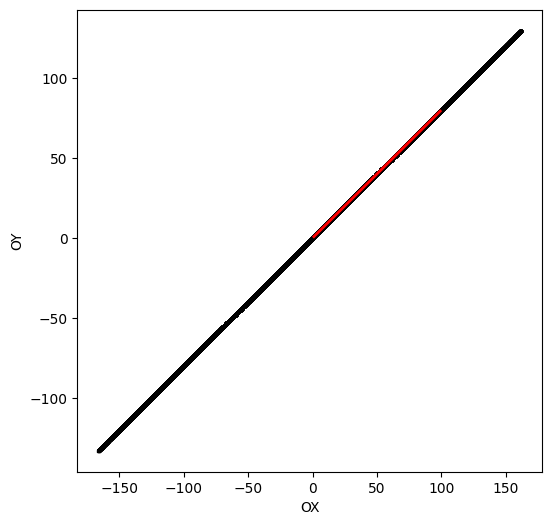

In [15]:
X1 = np.arange(1, 10, 1)
Y1 = 1.2 * X1

r = np.sqrt(X1**2 + Y1**2)

a = 0.8
X2 = r/np.sqrt(1 + a**2)
Y2 = a*X2

df_ML = pd.DataFrame({"X1":X1,
                      "Y1":Y1,
                      "X2":X2,
                      "Y2":Y2})

X_vars = df_ML[["X1", "Y1"]]
Y_var1 = df_ML["X2"]
Y_var2 = df_ML["Y2"]

model1 = LinearRegression(fit_intercept=False)
model1.fit(X_vars, Y_var1)

model2 = LinearRegression(fit_intercept=False)
model2.fit(X_vars, Y_var2)

x_rot = model1.coef_
y_rot = model2.coef_

df_rotated_Ml = pd.DataFrame()
df_rotated_Ml['X'] = df['X']*x_rot[0] + df['Y']*x_rot[1]
df_rotated_Ml['Y'] = df['X']*y_rot[0] + df['Y']*y_rot[1]


plt.figure(figsize=(6, 6))
plt.scatter(df_rotated_Ml["X"], df_rotated_Ml["Y"], c="black", s=1, marker="s")

plt.plot(np.arange(1, 100, 1), 0.8*np.arange(1, 100, 1), color="red", linewidth=2)

plt.xlabel("OX")
plt.ylabel("OY")
plt.grid(False)
plt.show()

In [16]:
print(0.8*x_rot)
print(y_rot)

[0.39992002 0.47990403]
[0.39992002 0.47990403]
